# Author: Taksh Shah

# Batch: June 2021

# GRIP 2021 Task - 2: Prediction Using Unsupervised ML

# TASK:- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

iris_data = pd.read_csv(r"E:\BVM\Internships\Iris.csv")
print(iris_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# Finding optimal number of clusters using Elbow method.

In [2]:
X=iris_data.iloc[:,[0,1,2,3]].values
ssd=[]
for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit(X)
    ssd.append(km.inertia_)

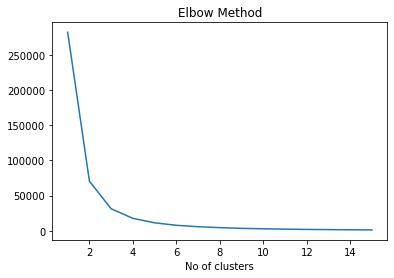

In [3]:
plt.plot(range(1,16),ssd)
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.show()

# In the above visualization of elbow method we can say 3 is the most efficient choice for no. of clusters.

# Training Model



In [4]:
km=KMeans(n_clusters=3,max_iter=300,n_init=12,random_state=1,init="k-means++")
km.fit(X)
labels=km.labels_
cluster_centers=km.cluster_centers_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


# Visualizing Kmeans clusters for SepalLength and SepalWidth

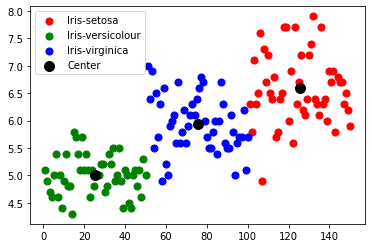

In [5]:
colors=["red","green","blue"]
legend_labels=['Iris-setosa','Iris-versicolour','Iris-virginica']
for i in range(3):
    plt.scatter(X[labels==i,0],X[labels==i,1],s=50,c=colors[i],label=legend_labels[i])
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c="black",s=100,label="Center")
plt.legend()
plt.show()

# Visualizing Kmeans clusters for PetalLength and PetalWidth

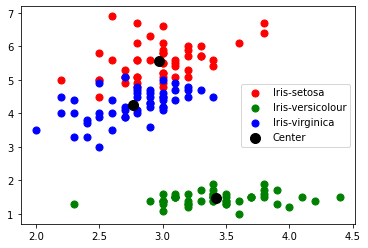

In [6]:
colors=["red","green","blue"]
legend_labels=['Iris-setosa','Iris-versicolour','Iris-virginica']
for i in range(3):
    plt.scatter(X[labels==i,2],X[labels==i,3],s=50,c=colors[i],label=legend_labels[i])
plt.scatter(cluster_centers[:,2],cluster_centers[:,3],c="black",s=100,label="Center")
plt.legend()
plt.show()